Phase 4 Project Notebook by Ryan S. Chung

# Introduction

In [1]:
import pandas as pd
import numpy as np
import os , shutil
import glob

In [2]:
import cv2
import matplotlib.image as mpimg

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from sklearn.model_selection import train_test_split

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.image as mpimg

In [5]:
import time
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [6]:
from matplotlib import image
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Initial MLP Creation

In [7]:
NORMAL = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\NORMAL\\*.jpeg")
PNEUMONIA = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\PNEUMONIA\\*jpeg")

In [8]:
data = []
labels = []

In [9]:
for i in NORMAL:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    data.append(image)
    labels.append(0)
    
for i in PNEUMONIA:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    data.append(image)
    labels.append(1)

In [10]:
data = np.array(data)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Label: 0


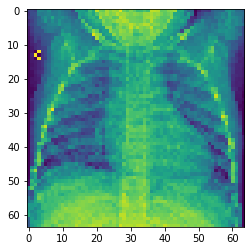

In [11]:
sample_image = X_train[0]
sample_label = y_train[0]
display(plt.imshow(sample_image))
print('Label: {}'.format(sample_label))

In [12]:
sample_image

array([[ 47,  58,  53, ...,  93,  92,  84],
       [ 37,  60,  63, ..., 102,  99,  94],
       [ 43,  54,  63, ..., 119, 108,  86],
       ...,
       [ 90, 144, 124, ..., 154, 111,   0],
       [ 73, 147, 154, ..., 160, 107,   0],
       [ 72, 136, 152, ..., 175,  81,   0]], dtype=uint8)

In [13]:
print(X_train.shape)
X_test.shape

(4172, 64, 64)


(1044, 64, 64)

In [14]:
X_train = X_train.reshape(4172, 4096).astype('float')
X_test = X_test.reshape(1044, 4096).astype('float')

In [15]:
print(X_train.shape)
X_test.shape

(4172, 4096)


(1044, 4096)

In [16]:
X_train /= 255.
X_test /= 255.

In [17]:
y_train[:2]

array([0, 1])

In [18]:
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [19]:
y_train[0]

array([1., 0.], dtype=float32)

In [20]:
Model_1 = Sequential()
Model_1.add(Dense(64, activation = 'tanh', input_shape = (4096,)))
Model_1.add(Dense(2, activation = 'softmax'))

In [21]:
Model_1.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [22]:
Model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                262208    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 262,338
Trainable params: 262,338
Non-trainable params: 0
_________________________________________________________________


In [23]:
results_1 = Model_1.fit(X_train, y_train, epochs = 12, batch_size = 64, validation_data = (X_test, y_test))

Epoch 1/12
66/66 [==============================] - 0s 4ms/step - loss: 0.5026 - acc: 0.7927 - val_loss: 1.2214 - val_acc: 0.2854
Epoch 2/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3843 - acc: 0.8351 - val_loss: 1.7577 - val_acc: 0.2787
Epoch 3/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3275 - acc: 0.8641 - val_loss: 0.2443 - val_acc: 0.8937
Epoch 4/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2674 - acc: 0.8909 - val_loss: 0.2839 - val_acc: 0.8649
Epoch 5/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2299 - acc: 0.9072 - val_loss: 0.1900 - val_acc: 0.9272
Epoch 6/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2124 - acc: 0.9168 - val_loss: 0.4630 - val_acc: 0.8065
Epoch 7/12
66/66 [==============================] - 0s 2ms/step - loss: 0.1899 - acc: 0.9240 - val_loss: 0.1645 - val_acc: 0.9262
Epoch 8/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2038 - acc: 0.92

In [24]:
def visualize_training_results(results):
    
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

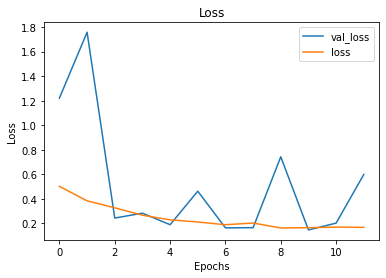

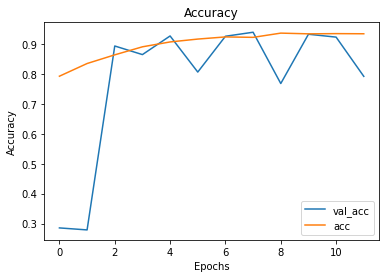

In [25]:
visualize_training_results(results_1)

In [26]:
Model_2 = Sequential()
Model_2.add(Dense(64, activation='tanh', input_shape=(4096,)))
Model_2.add(Dense(32, activation='tanh'))
Model_2.add(Dense(2, activation='softmax'))

In [27]:
Model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 264,354
Trainable params: 264,354
Non-trainable params: 0
_________________________________________________________________


In [28]:
Model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [29]:
results_2 = Model_2.fit(X_train, y_train, batch_size=64, epochs=12, validation_data=(X_test, y_test))

Epoch 1/12
66/66 [==============================] - 0s 3ms/step - loss: 0.5328 - acc: 0.7466 - val_loss: 0.4111 - val_acc: 0.7749
Epoch 2/12
66/66 [==============================] - 0s 2ms/step - loss: 0.4218 - acc: 0.8092 - val_loss: 0.3180 - val_acc: 0.8659
Epoch 3/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3246 - acc: 0.8636 - val_loss: 0.2588 - val_acc: 0.9167
Epoch 4/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2714 - acc: 0.8941 - val_loss: 0.2192 - val_acc: 0.9176
Epoch 5/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2462 - acc: 0.8993 - val_loss: 0.2174 - val_acc: 0.9128
Epoch 6/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2425 - acc: 0.8981 - val_loss: 0.2537 - val_acc: 0.8870
Epoch 7/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2087 - acc: 0.9135 - val_loss: 0.5622 - val_acc: 0.7356
Epoch 8/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2027 - acc: 0.91

In [30]:
def visualize_training_results(results):
    history = results.history
    
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

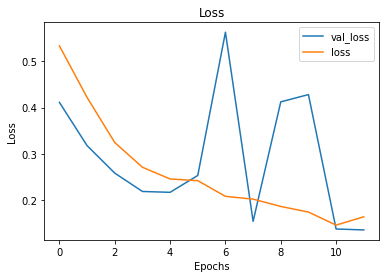

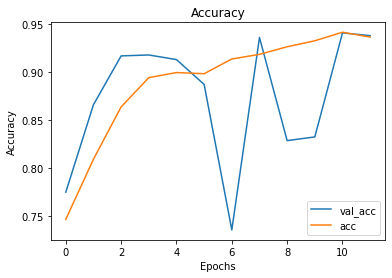

In [31]:
visualize_training_results(results_2)

In [32]:
Model_3 = Sequential()
Model_3.add(Dense(64, activation='relu', input_shape=(4096,)))
Model_3.add(Dense(32, activation='relu'))
Model_3.add(Dense(2, activation='softmax'))

In [33]:
Model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
Total params: 264,354
Trainable params: 264,354
Non-trainable params: 0
_________________________________________________________________


In [34]:
Model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [35]:
results_3 = Model_3.fit(X_train, y_train, epochs=12, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/12
66/66 [==============================] - 0s 3ms/step - loss: 0.4936 - acc: 0.7752 - val_loss: 0.4905 - val_acc: 0.7299
Epoch 2/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3888 - acc: 0.8425 - val_loss: 0.2878 - val_acc: 0.8889
Epoch 3/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3339 - acc: 0.8651 - val_loss: 0.2493 - val_acc: 0.9080
Epoch 4/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2827 - acc: 0.8926 - val_loss: 0.2435 - val_acc: 0.9148
Epoch 5/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2428 - acc: 0.9034 - val_loss: 0.8297 - val_acc: 0.6255
Epoch 6/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2263 - acc: 0.9166 - val_loss: 0.4748 - val_acc: 0.7807
Epoch 7/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2193 - acc: 0.9111 - val_loss: 0.8340 - val_acc: 0.7385
Epoch 8/12
66/66 [==============================] - 0s 2ms/step - loss: 0.1942 - acc: 0.92

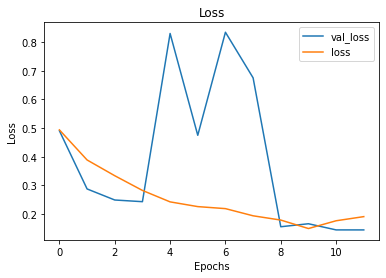

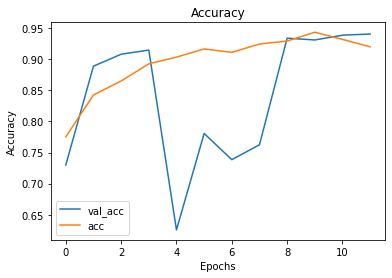

In [36]:
visualize_training_results(results_3)

# Creation of CNN

In [37]:
# Creating a CNN

In [38]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\test",
    target_size=(64, 64), batch_size = 180)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\val",
    target_size=(64, 64), batch_size = 200)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train",
    target_size=(64, 64), batch_size = 200)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [39]:
# Creating the data sets

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [40]:
# Explore your dataset again

m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 200
Number of testing samples: 180
Number of validation samples: 16
train_images shape: (200, 64, 64, 3)
train_labels shape: (200, 2)
test_images shape: (180, 64, 64, 3)
test_labels shape: (180, 2)
val_images shape: (16, 64, 64, 3)
val_labels shape: (16, 2)


In [41]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(200, 12288)
(180, 12288)
(16, 12288)


In [42]:
train_y = np.reshape(train_labels[:,0], (200,1))
test_y = np.reshape(test_labels[:,0], (180,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [ ]:
# Sample Image Display from train

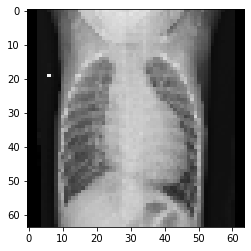

In [94]:
display(plt.imshow(train_images[0]))

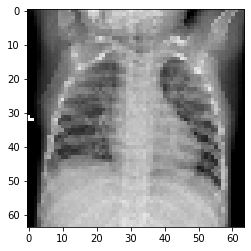

In [95]:
display(plt.imshow(train_images[1]))

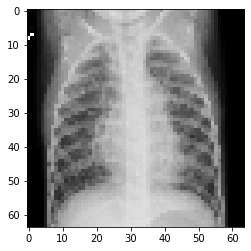

In [96]:
display(plt.imshow(train_images[2]))

In [43]:
from keras import models
from keras import layers
np.random.seed(123)

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
7/7 [==============================] - 0s 28ms/step - loss: 0.7057 - accuracy: 0.5600 - val_loss: 0.7930 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5892 - accuracy: 0.7200 - val_loss: 0.7455 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5812 - accuracy: 0.7200 - val_loss: 0.7305 - val_accuracy: 0.5000
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.7200 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5905 - accuracy: 0.7200 - val_loss: 0.8033 - val_accuracy: 0.5000
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.7200 - val_loss: 0.9274 - val_accuracy: 0.5000
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5439 - accuracy: 0.7200 - val_loss: 0.7289 - val_accuracy: 0.5000
Epoch 8/50
7/7 [=================

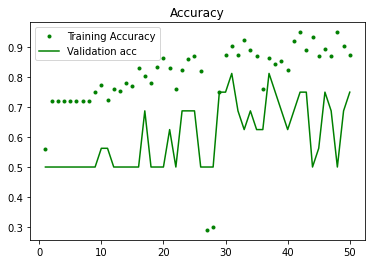

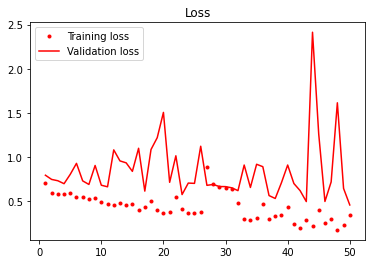

In [45]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

In [46]:
# visualize_training_results(history_A)

In [47]:
results_train = model.evaluate(train_img, train_y)

7/7 [==============================] - 0s 714us/step - loss: 0.2346 - accuracy: 0.9050


In [48]:
results_test = model.evaluate(test_img, test_y)

6/6 [==============================] - 0s 750us/step - loss: 0.3340 - accuracy: 0.8722


In [49]:
results_train

[0.23455727100372314, 0.9049999713897705]

In [50]:
results_test

[0.3339858949184418, 0.8722222447395325]

In [51]:
# Building a CNN

In [52]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/30
7/7 [==============================] - 0s 42ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.7016 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6332 - acc: 0.7200 - val_loss: 0.7306 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6095 - acc: 0.7200 - val_loss: 0.7331 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6032 - acc: 0.7200 - val_loss: 0.7580 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5969 - acc: 0.7200 - val_loss: 0.7720 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5932 - acc: 0.7200 - val_loss: 0.8095 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5935 - acc: 0.7200 - val_loss: 0.7730 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5921 - acc: 0.7200 - val

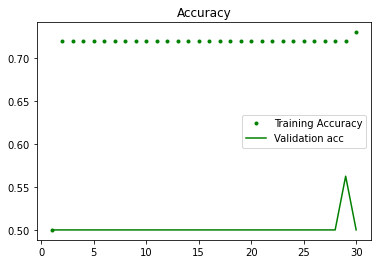

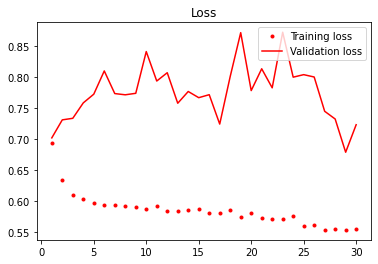

In [53]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

In [54]:
# visualize_training_results(history_B)

In [55]:
results_train = model.evaluate(train_images, train_y)

7/7 [==============================] - 0s 6ms/step - loss: 0.5448 - acc: 0.7200


In [56]:
results_test = model.evaluate(test_images, test_y)

6/6 [==============================] - 0s 6ms/step - loss: 0.5798 - acc: 0.6889


In [57]:
results_train

[0.5448285341262817, 0.7200000286102295]

In [58]:
results_test

[0.579835832118988, 0.6888889074325562]

# Grid Search Tuning

In [59]:
pip install talos

Note: you may need to restart the kernel to use updated packages.


In [60]:
import talos
import numpy

In [61]:
NORMAL_2 = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\NORMAL\\*.jpeg")
PNEUMONIA_2 = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\PNEUMONIA\\*jpeg")

In [62]:
data_2 = []
labels_2 = []

In [63]:
for i in NORMAL_2:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    data_2.append(image)
    labels_2.append(0)
    
for i in PNEUMONIA_2:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    data_2.append(image)
    labels_2.append(1)

In [64]:
data_2 = np.array(data_2)
labels_2 = np.array(labels_2)

X_train, X_test, y_train, y_test = train_test_split(data_2, labels_2, test_size=0.2, random_state=42)

In [65]:
def dense_network(x_train, y_train, x_test, y_test, params):
    
    model = models.Sequential()
    
    # hidden layers
    model.add(layers.Conv2D(32, (3, 3), activation=params['activation1'], input_shape=(64 ,64,  3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(32, (4, 4), activation=params['activation2']))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation=params['activation3']))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(64, activation=params['activation4']))
    model.add(layers.Dropout(params['dropout']))
    
    # output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
              optimizer=params['optimizer'],
              metrics=['acc'])

    out = model.fit(train_images,
                        train_y,
                        epochs=30,
                        batch_size=32,
                        validation_data=(val_images, val_y))
    return out, model

In [66]:
params = {'dropout': [0.1, 0.3, 0.5],
         'optimizer': ['adam', 'sgd'],
         'activation1': ['relu', 'tanh'],
         'activation2': ['relu', 'tanh'],
         'activation3': ['relu', 'tanh'],
         'activation4': ['relu', 'tanh'],}

In [67]:
results = talos.Scan(X_train, y_train, params=params, model = dense_network, experiment_name='grid')

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch 1/30
7/7 [==============================] - 0s 62ms/step - loss: 0.6830 - acc: 0.7150 - val_loss: 0.7048 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 29ms/step - loss: 0.6133 - acc: 0.7200 - val_loss: 0.9021 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6199 - acc: 0.7200 - val_loss: 0.7191 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5749 - acc: 0.7200 - val_loss: 0.7899 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5420 - acc: 0.7200 - val_loss: 0.8064 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 31ms/step - loss: 0.4967 - acc: 0.7500 - val_loss: 1.0535 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4783 - acc: 0.8050 - val_loss: 0.7783 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3743 - acc: 0.8000 - val

  1%|          | 1/96 [00:08<14:07,  8.92s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6697 - acc: 0.6200 - val_loss: 0.7105 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6164 - acc: 0.7200 - val_loss: 0.7652 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5996 - acc: 0.7200 - val_loss: 0.7688 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5922 - acc: 0.7200 - val_loss: 0.7546 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5977 - acc: 0.7200 - val_loss: 0.7779 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5894 - acc: 0.7200 - val_loss: 0.8284 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5970 - acc: 0.7200 - val_loss: 0.8042 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5819 - acc: 0.7200 - val

  2%|▏         | 2/96 [00:17<13:50,  8.84s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6648 - acc: 0.6250 - val_loss: 0.7389 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6174 - acc: 0.7200 - val_loss: 0.7480 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5957 - acc: 0.7200 - val_loss: 0.8156 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5767 - acc: 0.7200 - val_loss: 0.7556 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5717 - acc: 0.7200 - val_loss: 0.7181 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5404 - acc: 0.7200 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5205 - acc: 0.7350 - val_loss: 0.8250 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4323 - acc: 0.7650 - val

  3%|▎         | 3/96 [00:26<13:47,  8.89s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6981 - acc: 0.5100 - val_loss: 0.7009 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6295 - acc: 0.7200 - val_loss: 0.7210 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6124 - acc: 0.7200 - val_loss: 0.7351 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6066 - acc: 0.7200 - val_loss: 0.7785 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6022 - acc: 0.7200 - val_loss: 0.7763 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5965 - acc: 0.7150 - val_loss: 0.7808 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6059 - acc: 0.7200 - val_loss: 0.7422 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6008 - acc: 0.7200 - val

  4%|▍         | 4/96 [00:35<13:38,  8.89s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6140 - acc: 0.7200 - val_loss: 1.1085 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6426 - acc: 0.7200 - val_loss: 0.7287 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 39ms/step - loss: 0.6044 - acc: 0.7200 - val_loss: 0.8501 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6033 - acc: 0.7200 - val_loss: 0.7335 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5837 - acc: 0.7200 - val_loss: 0.7836 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5544 - acc: 0.7200 - val_loss: 0.8877 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5647 - acc: 0.7200 - val_loss: 0.6961 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.4879 - acc: 0.7700 - val

  5%|▌         | 5/96 [00:44<13:28,  8.89s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6516 - acc: 0.6650 - val_loss: 0.7179 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.6112 - acc: 0.7250 - val_loss: 0.7734 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6035 - acc: 0.7200 - val_loss: 0.7644 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5850 - acc: 0.7200 - val_loss: 0.7730 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5978 - acc: 0.7200 - val_loss: 0.7948 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6081 - acc: 0.7200 - val_loss: 0.8462 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6008 - acc: 0.7200 - val_loss: 0.7758 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5914 - acc: 0.7200 - val

  6%|▋         | 6/96 [00:53<13:14,  8.83s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6756 - acc: 0.6550 - val_loss: 0.6923 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6754 - acc: 0.5150 - val_loss: 0.8148 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5937 - acc: 0.7200 - val_loss: 0.7793 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5794 - acc: 0.7200 - val_loss: 0.8068 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5507 - acc: 0.7200 - val_loss: 0.7987 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4868 - acc: 0.7650 - val_loss: 0.6405 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4454 - acc: 0.8000 - val_loss: 1.0302 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4282 - acc: 0.7750 - val

  7%|▋         | 7/96 [01:02<13:15,  8.94s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6492 - acc: 0.7200 - val_loss: 0.7397 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6112 - acc: 0.7200 - val_loss: 0.7817 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6065 - acc: 0.7200 - val_loss: 0.7926 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.6039 - acc: 0.7200 - val_loss: 0.7984 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5984 - acc: 0.7200 - val_loss: 0.7810 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5976 - acc: 0.7200 - val_loss: 0.7764 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5977 - acc: 0.7200 - val_loss: 0.8002 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5945 - acc: 0.7200 - val

  8%|▊         | 8/96 [01:11<13:06,  8.94s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6409 - acc: 0.6950 - val_loss: 0.7876 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5778 - acc: 0.7250 - val_loss: 0.6831 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5383 - acc: 0.7750 - val_loss: 0.6287 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4720 - acc: 0.7900 - val_loss: 0.8244 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3887 - acc: 0.8650 - val_loss: 0.5921 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3643 - acc: 0.8450 - val_loss: 0.9452 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2983 - acc: 0.8750 - val_loss: 0.9326 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2634 - acc: 0.9150 - val

  9%|▉         | 9/96 [01:19<12:52,  8.88s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6585 - acc: 0.6900 - val_loss: 0.7143 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6143 - acc: 0.7200 - val_loss: 0.7428 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6053 - acc: 0.7200 - val_loss: 0.7755 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6044 - acc: 0.7200 - val_loss: 0.7785 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5891 - acc: 0.7200 - val_loss: 0.8409 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5867 - acc: 0.7200 - val_loss: 0.8348 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5816 - acc: 0.7200 - val_loss: 0.7295 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5915 - acc: 0.7200 - val

 10%|█         | 10/96 [01:28<12:38,  8.82s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6491 - acc: 0.7200 - val_loss: 0.6986 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6106 - acc: 0.7200 - val_loss: 0.9210 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5823 - acc: 0.7200 - val_loss: 0.6908 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5584 - acc: 0.7350 - val_loss: 0.7913 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4988 - acc: 0.7550 - val_loss: 0.7338 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4167 - acc: 0.8450 - val_loss: 0.5925 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3624 - acc: 0.8300 - val_loss: 0.5408 - val_acc: 0.6875
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.4383 - acc: 0.7750 - val

 11%|█▏        | 11/96 [01:37<12:28,  8.80s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6533 - acc: 0.6750 - val_loss: 0.7271 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6126 - acc: 0.7200 - val_loss: 0.7886 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6107 - acc: 0.7200 - val_loss: 0.8077 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5954 - acc: 0.7200 - val_loss: 0.7993 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 30ms/step - loss: 0.6030 - acc: 0.7200 - val_loss: 0.7499 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5972 - acc: 0.7200 - val_loss: 0.7514 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5955 - acc: 0.7200 - val_loss: 0.7884 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5865 - acc: 0.7200 - val

 12%|█▎        | 12/96 [01:46<12:15,  8.76s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6859 - acc: 0.6500 - val_loss: 0.6856 - val_acc: 0.6250
Epoch 2/30
7/7 [==============================] - 0s 29ms/step - loss: 0.6011 - acc: 0.7250 - val_loss: 0.9775 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5945 - acc: 0.7200 - val_loss: 0.7435 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5790 - acc: 0.7200 - val_loss: 0.7622 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5256 - acc: 0.7300 - val_loss: 1.0176 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5184 - acc: 0.7450 - val_loss: 0.6386 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4375 - acc: 0.7750 - val_loss: 0.6478 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3479 - acc: 0.8700 - val

 14%|█▎        | 13/96 [01:54<12:05,  8.74s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6560 - acc: 0.7000 - val_loss: 0.7351 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6094 - acc: 0.7200 - val_loss: 0.7693 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5953 - acc: 0.7200 - val_loss: 0.8182 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5954 - acc: 0.7200 - val_loss: 0.8236 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5938 - acc: 0.7200 - val_loss: 0.8204 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5933 - acc: 0.7200 - val_loss: 0.7621 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5894 - acc: 0.7200 - val_loss: 0.7679 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5904 - acc: 0.7200 - val

 15%|█▍        | 14/96 [02:03<11:54,  8.71s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6236 - acc: 0.6900 - val_loss: 0.7657 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6044 - acc: 0.7200 - val_loss: 0.7852 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5699 - acc: 0.7200 - val_loss: 0.8127 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5323 - acc: 0.7200 - val_loss: 0.7293 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 31ms/step - loss: 0.4536 - acc: 0.8000 - val_loss: 0.8579 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4121 - acc: 0.8100 - val_loss: 0.9577 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3588 - acc: 0.8500 - val_loss: 0.9642 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3432 - acc: 0.8700 - val

 16%|█▌        | 15/96 [02:12<11:46,  8.72s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6618 - acc: 0.6950 - val_loss: 0.7082 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 29ms/step - loss: 0.6231 - acc: 0.7200 - val_loss: 0.7603 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6103 - acc: 0.7200 - val_loss: 0.7577 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6004 - acc: 0.7200 - val_loss: 0.7904 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5950 - acc: 0.7200 - val_loss: 0.7600 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6042 - acc: 0.7200 - val_loss: 0.7486 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6021 - acc: 0.7200 - val_loss: 0.7747 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6002 - acc: 0.7200 - val

 17%|█▋        | 16/96 [02:20<11:35,  8.70s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.5972 - acc: 0.7000 - val_loss: 0.8855 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6492 - acc: 0.7000 - val_loss: 0.8273 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5926 - acc: 0.7200 - val_loss: 0.7248 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5463 - acc: 0.7200 - val_loss: 0.8002 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4739 - acc: 0.7750 - val_loss: 1.0587 - val_acc: 0.5625
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4821 - acc: 0.7850 - val_loss: 1.0433 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.3797 - acc: 0.8450 - val_loss: 0.6705 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.2906 - acc: 0.9050 - val

 18%|█▊        | 17/96 [02:29<11:28,  8.71s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6960 - acc: 0.5250 - val_loss: 0.6993 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6530 - acc: 0.7050 - val_loss: 0.7135 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6339 - acc: 0.7200 - val_loss: 0.7266 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6193 - acc: 0.7200 - val_loss: 0.7500 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6173 - acc: 0.7200 - val_loss: 0.7363 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6169 - acc: 0.7200 - val_loss: 0.7691 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6091 - acc: 0.7200 - val_loss: 0.7584 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6003 - acc: 0.7200 - val

 19%|█▉        | 18/96 [02:38<11:18,  8.69s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6358 - acc: 0.6700 - val_loss: 0.9944 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 29ms/step - loss: 0.6246 - acc: 0.7350 - val_loss: 0.7601 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5319 - acc: 0.7300 - val_loss: 0.6144 - val_acc: 0.6875
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4925 - acc: 0.8500 - val_loss: 0.9802 - val_acc: 0.5625
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3828 - acc: 0.7900 - val_loss: 0.5343 - val_acc: 0.7500
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4054 - acc: 0.7900 - val_loss: 0.8097 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3424 - acc: 0.8850 - val_loss: 1.7127 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3062 - acc: 0.8550 - val

 20%|█▉        | 19/96 [02:46<11:10,  8.70s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6682 - acc: 0.6000 - val_loss: 0.7802 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5928 - acc: 0.7200 - val_loss: 0.8038 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5913 - acc: 0.7200 - val_loss: 0.7670 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5865 - acc: 0.7200 - val_loss: 0.8643 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5867 - acc: 0.7200 - val_loss: 0.7847 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5821 - acc: 0.7200 - val_loss: 0.7353 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5760 - acc: 0.7200 - val_loss: 0.7963 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 42ms/step - loss: 0.5716 - acc: 0.7200 - val

 21%|██        | 20/96 [02:56<11:12,  8.85s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6456 - acc: 0.6950 - val_loss: 0.9506 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6137 - acc: 0.7200 - val_loss: 0.7351 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5109 - acc: 0.7150 - val_loss: 0.7490 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4076 - acc: 0.8200 - val_loss: 1.1221 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3546 - acc: 0.8300 - val_loss: 0.8913 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.2683 - acc: 0.9100 - val_loss: 0.4829 - val_acc: 0.8125
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.3635 - acc: 0.8100 - val_loss: 1.4771 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3629 - acc: 0.8250 - val

 22%|██▏       | 21/96 [03:05<11:08,  8.91s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6443 - acc: 0.6950 - val_loss: 0.7225 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6099 - acc: 0.7200 - val_loss: 0.8122 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5993 - acc: 0.7200 - val_loss: 0.8429 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5964 - acc: 0.7200 - val_loss: 0.8206 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 40ms/step - loss: 0.5974 - acc: 0.7200 - val_loss: 0.8187 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5924 - acc: 0.7200 - val_loss: 0.8181 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5843 - acc: 0.7200 - val_loss: 0.7898 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5859 - acc: 0.7200 - val

 23%|██▎       | 22/96 [03:13<10:59,  8.91s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6455 - acc: 0.6700 - val_loss: 1.1212 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6104 - acc: 0.7200 - val_loss: 0.7033 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5567 - acc: 0.7200 - val_loss: 0.7511 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4603 - acc: 0.7550 - val_loss: 0.8985 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4053 - acc: 0.7900 - val_loss: 0.8005 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3304 - acc: 0.8750 - val_loss: 1.1126 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3108 - acc: 0.8450 - val_loss: 0.9099 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.2511 - acc: 0.9150 - val

 24%|██▍       | 23/96 [03:22<10:49,  8.90s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6501 - acc: 0.6050 - val_loss: 0.7200 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5936 - acc: 0.7150 - val_loss: 0.7651 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5970 - acc: 0.7200 - val_loss: 0.7396 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5883 - acc: 0.7200 - val_loss: 0.8035 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5724 - acc: 0.7200 - val_loss: 0.8076 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5941 - acc: 0.7200 - val_loss: 0.8341 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5679 - acc: 0.7200 - val_loss: 0.7491 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5910 - acc: 0.7200 - val

 25%|██▌       | 24/96 [03:31<10:33,  8.80s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6343 - acc: 0.6850 - val_loss: 0.7300 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6028 - acc: 0.7200 - val_loss: 0.8468 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5731 - acc: 0.7200 - val_loss: 0.7149 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5513 - acc: 0.7200 - val_loss: 0.8470 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5117 - acc: 0.7750 - val_loss: 0.8160 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3759 - acc: 0.8200 - val_loss: 0.6491 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3143 - acc: 0.8650 - val_loss: 1.8837 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4434 - acc: 0.8300 - val

 26%|██▌       | 25/96 [03:40<10:25,  8.81s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6436 - acc: 0.6500 - val_loss: 0.7576 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5935 - acc: 0.7200 - val_loss: 0.8935 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5914 - acc: 0.7200 - val_loss: 0.8124 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5936 - acc: 0.7200 - val_loss: 0.7740 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5892 - acc: 0.7200 - val_loss: 0.8865 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5942 - acc: 0.7200 - val_loss: 0.8096 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5857 - acc: 0.7200 - val_loss: 0.8537 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5826 - acc: 0.7200 - val

 27%|██▋       | 26/96 [03:49<10:15,  8.80s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6201 - acc: 0.6850 - val_loss: 0.7451 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5919 - acc: 0.7200 - val_loss: 0.7467 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5524 - acc: 0.7200 - val_loss: 0.8468 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5226 - acc: 0.7150 - val_loss: 1.0114 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4998 - acc: 0.7600 - val_loss: 1.1523 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5016 - acc: 0.7550 - val_loss: 0.7428 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3682 - acc: 0.8200 - val_loss: 0.5806 - val_acc: 0.6875
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3086 - acc: 0.8900 - val

 28%|██▊       | 27/96 [03:57<10:04,  8.76s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6238 - acc: 0.7100 - val_loss: 0.7912 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6098 - acc: 0.7200 - val_loss: 0.8017 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6000 - acc: 0.7200 - val_loss: 0.8249 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5965 - acc: 0.7200 - val_loss: 0.7935 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5806 - acc: 0.7200 - val_loss: 0.8248 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6039 - acc: 0.7200 - val_loss: 0.8038 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5759 - acc: 0.7200 - val_loss: 0.8144 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5789 - acc: 0.7200 - val

 29%|██▉       | 28/96 [04:06<09:51,  8.69s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6491 - acc: 0.6350 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.6407 - acc: 0.6850 - val_loss: 0.7913 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6012 - acc: 0.7200 - val_loss: 0.7757 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5810 - acc: 0.7200 - val_loss: 0.8653 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5800 - acc: 0.7250 - val_loss: 0.7702 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5553 - acc: 0.7150 - val_loss: 0.7229 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5777 - acc: 0.7500 - val_loss: 0.8425 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5343 - acc: 0.7100 - val

 30%|███       | 29/96 [04:15<09:45,  8.73s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6172 - acc: 0.7200 - val_loss: 0.7433 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 29ms/step - loss: 0.5908 - acc: 0.7200 - val_loss: 0.7686 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5919 - acc: 0.7200 - val_loss: 0.7780 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6070 - acc: 0.7200 - val_loss: 0.7732 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 40ms/step - loss: 0.5851 - acc: 0.7200 - val_loss: 0.7556 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5834 - acc: 0.7200 - val_loss: 0.8023 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5854 - acc: 0.7200 - val_loss: 0.8729 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5922 - acc: 0.7200 - val

 31%|███▏      | 30/96 [04:24<09:43,  8.84s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.7416 - acc: 0.6150 - val_loss: 0.7736 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5909 - acc: 0.7300 - val_loss: 0.8939 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5410 - acc: 0.7250 - val_loss: 0.8466 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4412 - acc: 0.8000 - val_loss: 0.5960 - val_acc: 0.6875
Epoch 5/30
7/7 [==============================] - 0s 31ms/step - loss: 0.4833 - acc: 0.7800 - val_loss: 0.7965 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3463 - acc: 0.8300 - val_loss: 0.5691 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3064 - acc: 0.8900 - val_loss: 0.8236 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.2789 - acc: 0.8850 - val

 32%|███▏      | 31/96 [04:33<09:40,  8.93s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6252 - acc: 0.7100 - val_loss: 0.7633 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 29ms/step - loss: 0.5897 - acc: 0.7200 - val_loss: 0.7807 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5804 - acc: 0.7200 - val_loss: 0.8282 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5757 - acc: 0.7200 - val_loss: 0.8429 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5729 - acc: 0.7200 - val_loss: 0.7737 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5720 - acc: 0.7200 - val_loss: 0.7123 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5857 - acc: 0.7200 - val_loss: 0.7949 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5664 - acc: 0.7200 - val

 33%|███▎      | 32/96 [04:42<09:28,  8.89s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.5951 - acc: 0.7150 - val_loss: 0.9252 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5376 - acc: 0.7400 - val_loss: 0.7276 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4301 - acc: 0.7800 - val_loss: 0.6668 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3508 - acc: 0.8400 - val_loss: 1.2997 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3550 - acc: 0.8150 - val_loss: 1.7173 - val_acc: 0.5625
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4051 - acc: 0.8250 - val_loss: 0.4607 - val_acc: 0.8125
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2959 - acc: 0.8750 - val_loss: 0.8660 - val_acc: 0.5625
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2341 - acc: 0.9000 - val

 34%|███▍      | 33/96 [04:50<09:19,  8.88s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6590 - acc: 0.6150 - val_loss: 0.7701 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5900 - acc: 0.7200 - val_loss: 0.7648 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5926 - acc: 0.7200 - val_loss: 0.7864 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5813 - acc: 0.7200 - val_loss: 0.7429 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5891 - acc: 0.7200 - val_loss: 0.7078 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5837 - acc: 0.7200 - val_loss: 0.7828 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5767 - acc: 0.7200 - val_loss: 0.8280 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5728 - acc: 0.7200 - val

 35%|███▌      | 34/96 [04:59<09:10,  8.89s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6559 - acc: 0.6350 - val_loss: 1.0278 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6438 - acc: 0.7250 - val_loss: 0.6965 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5620 - acc: 0.7350 - val_loss: 1.0048 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5456 - acc: 0.7600 - val_loss: 0.7237 - val_acc: 0.5625
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4362 - acc: 0.7800 - val_loss: 0.5614 - val_acc: 0.7500
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4515 - acc: 0.7900 - val_loss: 0.5503 - val_acc: 0.6875
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.4783 - acc: 0.7650 - val_loss: 1.0775 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3691 - acc: 0.8350 - val

 36%|███▋      | 35/96 [05:08<08:59,  8.85s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6842 - acc: 0.5600 - val_loss: 0.7177 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6160 - acc: 0.7200 - val_loss: 0.7349 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5910 - acc: 0.7200 - val_loss: 0.8171 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5863 - acc: 0.7200 - val_loss: 0.8075 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5903 - acc: 0.7200 - val_loss: 0.7913 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5894 - acc: 0.7200 - val_loss: 0.7569 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5800 - acc: 0.7300 - val_loss: 0.7350 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5596 - acc: 0.7200 - val

 38%|███▊      | 36/96 [05:17<08:47,  8.80s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6177 - acc: 0.6500 - val_loss: 1.1368 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.6176 - acc: 0.7500 - val_loss: 0.7134 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5946 - acc: 0.7200 - val_loss: 0.6896 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5397 - acc: 0.7200 - val_loss: 0.7243 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 31ms/step - loss: 0.4444 - acc: 0.7850 - val_loss: 0.7835 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3490 - acc: 0.8800 - val_loss: 1.3445 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3465 - acc: 0.8500 - val_loss: 1.1771 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2468 - acc: 0.9050 - val

 39%|███▊      | 37/96 [05:26<08:39,  8.81s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6435 - acc: 0.7300 - val_loss: 0.7148 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.6109 - acc: 0.7200 - val_loss: 0.7420 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5943 - acc: 0.7200 - val_loss: 0.7663 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5888 - acc: 0.7200 - val_loss: 0.7664 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5989 - acc: 0.7200 - val_loss: 0.7703 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5885 - acc: 0.7200 - val_loss: 0.7863 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5871 - acc: 0.7200 - val_loss: 0.8057 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5785 - acc: 0.7200 - val

 40%|███▉      | 38/96 [05:34<08:28,  8.77s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6275 - acc: 0.7000 - val_loss: 0.7012 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5444 - acc: 0.7200 - val_loss: 0.8162 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.4778 - acc: 0.7450 - val_loss: 0.8102 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3790 - acc: 0.8200 - val_loss: 1.6719 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4066 - acc: 0.8300 - val_loss: 1.7484 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4520 - acc: 0.8100 - val_loss: 0.8133 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3165 - acc: 0.8600 - val_loss: 0.7027 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2538 - acc: 0.9200 - val

 41%|████      | 39/96 [05:43<08:20,  8.79s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6201 - acc: 0.7050 - val_loss: 0.8410 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6030 - acc: 0.7200 - val_loss: 0.8536 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5956 - acc: 0.7200 - val_loss: 0.7459 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5836 - acc: 0.7200 - val_loss: 0.7889 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5708 - acc: 0.7200 - val_loss: 0.8050 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5883 - acc: 0.7200 - val_loss: 0.8319 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5779 - acc: 0.7200 - val_loss: 0.7437 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5792 - acc: 0.7200 - val

 42%|████▏     | 40/96 [05:52<08:11,  8.77s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6572 - acc: 0.6250 - val_loss: 0.8384 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6051 - acc: 0.7200 - val_loss: 0.7967 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5971 - acc: 0.7200 - val_loss: 0.8030 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5606 - acc: 0.7200 - val_loss: 0.7087 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5301 - acc: 0.7300 - val_loss: 0.7550 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5079 - acc: 0.7150 - val_loss: 1.0454 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4375 - acc: 0.7950 - val_loss: 1.1465 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.4315 - acc: 0.8300 - val

 43%|████▎     | 41/96 [06:01<08:03,  8.78s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6701 - acc: 0.5850 - val_loss: 0.7199 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 29ms/step - loss: 0.6142 - acc: 0.7250 - val_loss: 0.7320 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5992 - acc: 0.7200 - val_loss: 0.7607 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5908 - acc: 0.7200 - val_loss: 0.7677 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5898 - acc: 0.7200 - val_loss: 0.7755 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5918 - acc: 0.7200 - val_loss: 0.7397 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5877 - acc: 0.7200 - val_loss: 0.7533 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5916 - acc: 0.7200 - val

 44%|████▍     | 42/96 [06:09<07:53,  8.77s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6484 - acc: 0.6800 - val_loss: 0.8497 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5071 - acc: 0.7300 - val_loss: 0.6404 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.4683 - acc: 0.8000 - val_loss: 1.0186 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4251 - acc: 0.7950 - val_loss: 0.5349 - val_acc: 0.7500
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3565 - acc: 0.8400 - val_loss: 0.9141 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3112 - acc: 0.8900 - val_loss: 0.8892 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.2326 - acc: 0.9150 - val_loss: 0.6058 - val_acc: 0.7500
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.1933 - acc: 0.9350 - val

 45%|████▍     | 43/96 [06:18<07:45,  8.78s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.6656 - acc: 0.6200 - val_loss: 0.7905 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5996 - acc: 0.7200 - val_loss: 0.8517 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5861 - acc: 0.7200 - val_loss: 0.7544 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5920 - acc: 0.7200 - val_loss: 0.7963 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5845 - acc: 0.7200 - val_loss: 0.7654 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5714 - acc: 0.7200 - val_loss: 0.7472 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5709 - acc: 0.7200 - val_loss: 0.8445 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5637 - acc: 0.7200 - val

 46%|████▌     | 44/96 [06:27<07:34,  8.74s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6733 - acc: 0.7100 - val_loss: 0.8606 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5534 - acc: 0.7250 - val_loss: 0.7293 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4654 - acc: 0.7450 - val_loss: 0.8210 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3788 - acc: 0.8450 - val_loss: 0.7697 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 31ms/step - loss: 0.3331 - acc: 0.8350 - val_loss: 0.5778 - val_acc: 0.6875
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3100 - acc: 0.8600 - val_loss: 0.5795 - val_acc: 0.6875
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3042 - acc: 0.8850 - val_loss: 1.0874 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2415 - acc: 0.8900 - val

 47%|████▋     | 45/96 [06:36<07:26,  8.75s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6170 - acc: 0.7250 - val_loss: 0.7753 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 29ms/step - loss: 0.5870 - acc: 0.7200 - val_loss: 0.7859 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5849 - acc: 0.7200 - val_loss: 0.7603 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5768 - acc: 0.7200 - val_loss: 0.7516 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5572 - acc: 0.7200 - val_loss: 0.7532 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5639 - acc: 0.7200 - val_loss: 0.7736 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5774 - acc: 0.7200 - val_loss: 0.6722 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5755 - acc: 0.7100 - val

 48%|████▊     | 46/96 [06:44<07:16,  8.73s/it]

Epoch 1/30
7/7 [==============================] - 0s 43ms/step - loss: 0.8537 - acc: 0.5150 - val_loss: 0.9441 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5684 - acc: 0.7200 - val_loss: 0.7399 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5122 - acc: 0.7250 - val_loss: 0.6984 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4401 - acc: 0.8300 - val_loss: 0.5974 - val_acc: 0.6875
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4040 - acc: 0.8250 - val_loss: 0.6370 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3073 - acc: 0.8700 - val_loss: 0.8793 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 31ms/step - loss: 0.3375 - acc: 0.8450 - val_loss: 0.9510 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2614 - acc: 0.8850 - val

 49%|████▉     | 47/96 [06:53<07:08,  8.74s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6375 - acc: 0.7000 - val_loss: 0.6964 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6111 - acc: 0.6850 - val_loss: 0.7563 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5776 - acc: 0.7200 - val_loss: 0.8170 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5974 - acc: 0.7200 - val_loss: 0.7701 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5798 - acc: 0.7200 - val_loss: 0.7545 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5761 - acc: 0.7200 - val_loss: 0.7618 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5680 - acc: 0.7200 - val_loss: 0.6859 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5686 - acc: 0.7300 - val

 50%|█████     | 48/96 [07:02<06:58,  8.73s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6387 - acc: 0.6350 - val_loss: 0.6904 - val_acc: 0.6250
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.6505 - acc: 0.7250 - val_loss: 0.7803 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5807 - acc: 0.7200 - val_loss: 0.8334 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5612 - acc: 0.7200 - val_loss: 0.8077 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5431 - acc: 0.7200 - val_loss: 0.7062 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5311 - acc: 0.7850 - val_loss: 1.0054 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5430 - acc: 0.7300 - val_loss: 0.6629 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4551 - acc: 0.7700 - val

 51%|█████     | 49/96 [07:11<06:53,  8.80s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6718 - acc: 0.6200 - val_loss: 0.7122 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.6195 - acc: 0.7200 - val_loss: 0.7558 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5990 - acc: 0.7200 - val_loss: 0.7419 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6002 - acc: 0.7200 - val_loss: 0.7562 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6043 - acc: 0.7200 - val_loss: 0.7749 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5927 - acc: 0.7200 - val_loss: 0.8146 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5955 - acc: 0.7200 - val_loss: 0.8110 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5852 - acc: 0.7200 - val

 52%|█████▏    | 50/96 [07:20<06:45,  8.83s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6139 - acc: 0.7200 - val_loss: 0.7700 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5806 - acc: 0.7200 - val_loss: 0.9674 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6137 - acc: 0.7200 - val_loss: 0.6920 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5346 - acc: 0.7200 - val_loss: 0.9551 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5127 - acc: 0.7200 - val_loss: 0.7382 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4194 - acc: 0.7750 - val_loss: 1.1435 - val_acc: 0.5625
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4552 - acc: 0.7750 - val_loss: 1.0160 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3742 - acc: 0.8250 - val

 53%|█████▎    | 51/96 [07:29<06:39,  8.87s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6627 - acc: 0.6300 - val_loss: 0.7495 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5904 - acc: 0.7200 - val_loss: 0.8812 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5982 - acc: 0.7200 - val_loss: 0.8143 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6000 - acc: 0.7200 - val_loss: 0.8033 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5844 - acc: 0.7200 - val_loss: 0.7590 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5955 - acc: 0.7200 - val_loss: 0.8089 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5865 - acc: 0.7200 - val_loss: 0.7897 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5764 - acc: 0.7200 - val

 54%|█████▍    | 52/96 [07:38<06:30,  8.87s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.7010 - acc: 0.6950 - val_loss: 0.7188 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5941 - acc: 0.7200 - val_loss: 0.9667 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6202 - acc: 0.7200 - val_loss: 0.7696 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5936 - acc: 0.7200 - val_loss: 0.7965 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5703 - acc: 0.7200 - val_loss: 0.7680 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5581 - acc: 0.7200 - val_loss: 0.8012 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5477 - acc: 0.7200 - val_loss: 0.8097 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5057 - acc: 0.7200 - val

 55%|█████▌    | 53/96 [07:46<06:22,  8.90s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6507 - acc: 0.6600 - val_loss: 0.7290 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6078 - acc: 0.7200 - val_loss: 0.7898 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6012 - acc: 0.7150 - val_loss: 0.7583 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6154 - acc: 0.7200 - val_loss: 0.7256 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5995 - acc: 0.7200 - val_loss: 0.7380 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5921 - acc: 0.7200 - val_loss: 0.7404 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5811 - acc: 0.7200 - val_loss: 0.7475 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5825 - acc: 0.7200 - val

 56%|█████▋    | 54/96 [07:55<06:14,  8.91s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.5948 - acc: 0.7550 - val_loss: 1.0228 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5107 - acc: 0.7400 - val_loss: 0.7848 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4276 - acc: 0.7900 - val_loss: 0.9821 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3782 - acc: 0.8350 - val_loss: 1.2693 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3657 - acc: 0.8550 - val_loss: 0.5904 - val_acc: 0.6875
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2973 - acc: 0.8850 - val_loss: 0.5069 - val_acc: 0.8125
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.2246 - acc: 0.8950 - val_loss: 0.9187 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.1621 - acc: 0.9400 - val

 57%|█████▋    | 55/96 [08:04<06:05,  8.91s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6099 - acc: 0.7200 - val_loss: 0.8362 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6045 - acc: 0.7200 - val_loss: 0.8561 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6012 - acc: 0.7200 - val_loss: 0.7459 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5991 - acc: 0.7200 - val_loss: 0.8628 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5861 - acc: 0.7200 - val_loss: 0.7730 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5905 - acc: 0.7200 - val_loss: 0.7393 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5915 - acc: 0.7200 - val_loss: 0.7649 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5843 - acc: 0.7200 - val

 58%|█████▊    | 56/96 [08:13<05:56,  8.91s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6945 - acc: 0.6250 - val_loss: 0.7560 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6191 - acc: 0.7200 - val_loss: 0.7066 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6068 - acc: 0.7200 - val_loss: 0.8007 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5954 - acc: 0.7550 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5844 - acc: 0.7200 - val_loss: 0.8438 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5352 - acc: 0.7350 - val_loss: 0.6858 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4692 - acc: 0.7500 - val_loss: 0.5621 - val_acc: 0.7500
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4628 - acc: 0.7850 - val

 59%|█████▉    | 57/96 [08:22<05:48,  8.93s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6599 - acc: 0.6250 - val_loss: 0.7580 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5963 - acc: 0.7200 - val_loss: 0.7166 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6108 - acc: 0.7200 - val_loss: 0.7903 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6024 - acc: 0.7200 - val_loss: 0.8513 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5882 - acc: 0.7200 - val_loss: 0.7786 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5840 - acc: 0.7200 - val_loss: 0.8647 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5835 - acc: 0.7200 - val_loss: 0.7766 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5783 - acc: 0.7200 - val

 60%|██████    | 58/96 [08:31<05:38,  8.91s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6493 - acc: 0.6500 - val_loss: 0.6855 - val_acc: 0.5625
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6117 - acc: 0.7050 - val_loss: 1.0264 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5698 - acc: 0.7200 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5448 - acc: 0.7200 - val_loss: 0.6573 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5372 - acc: 0.7750 - val_loss: 0.8785 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4852 - acc: 0.7750 - val_loss: 0.6937 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3753 - acc: 0.8500 - val_loss: 0.7444 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.2880 - acc: 0.8900 - val

 61%|██████▏   | 59/96 [08:40<05:30,  8.93s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6151 - acc: 0.6950 - val_loss: 0.7119 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6185 - acc: 0.7050 - val_loss: 0.9070 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6056 - acc: 0.7250 - val_loss: 0.7411 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5901 - acc: 0.7250 - val_loss: 0.8584 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5913 - acc: 0.7200 - val_loss: 0.7526 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5930 - acc: 0.7200 - val_loss: 0.7354 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5885 - acc: 0.7250 - val_loss: 0.9173 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5818 - acc: 0.7200 - val

 62%|██████▎   | 60/96 [08:49<05:21,  8.93s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.5929 - acc: 0.7200 - val_loss: 0.7229 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5777 - acc: 0.7200 - val_loss: 0.8015 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5266 - acc: 0.7450 - val_loss: 0.8368 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4585 - acc: 0.7750 - val_loss: 1.0111 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3613 - acc: 0.8200 - val_loss: 0.9496 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3038 - acc: 0.8600 - val_loss: 1.7309 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2884 - acc: 0.8850 - val_loss: 0.5710 - val_acc: 0.7500
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.2533 - acc: 0.8900 - val

 64%|██████▎   | 61/96 [08:58<05:13,  8.95s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6362 - acc: 0.6900 - val_loss: 0.7446 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5941 - acc: 0.7200 - val_loss: 0.7416 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5905 - acc: 0.7200 - val_loss: 0.7394 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5868 - acc: 0.7200 - val_loss: 0.7292 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5913 - acc: 0.7200 - val_loss: 0.7728 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5749 - acc: 0.7200 - val_loss: 0.7732 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5751 - acc: 0.7200 - val_loss: 0.7807 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5698 - acc: 0.7200 - val

 65%|██████▍   | 62/96 [09:07<05:04,  8.95s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6315 - acc: 0.7200 - val_loss: 1.0312 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5841 - acc: 0.7200 - val_loss: 0.6969 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5803 - acc: 0.7200 - val_loss: 0.6921 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5433 - acc: 0.7200 - val_loss: 0.7928 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4686 - acc: 0.7700 - val_loss: 0.7285 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3893 - acc: 0.8350 - val_loss: 0.7982 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2926 - acc: 0.9000 - val_loss: 0.8203 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2658 - acc: 0.8850 - val

 66%|██████▌   | 63/96 [09:16<04:57,  9.01s/it]

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6502 - acc: 0.7100 - val_loss: 0.7198 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6030 - acc: 0.7200 - val_loss: 0.7910 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5995 - acc: 0.7200 - val_loss: 0.7991 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5871 - acc: 0.7200 - val_loss: 0.8249 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6044 - acc: 0.7200 - val_loss: 0.8557 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5931 - acc: 0.7200 - val_loss: 0.8159 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5870 - acc: 0.7200 - val_loss: 0.8248 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5944 - acc: 0.7200 - val

 67%|██████▋   | 64/96 [09:25<04:47,  8.97s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6258 - acc: 0.6700 - val_loss: 0.6911 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6206 - acc: 0.6800 - val_loss: 0.9267 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5791 - acc: 0.7200 - val_loss: 0.7166 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5336 - acc: 0.7200 - val_loss: 0.7076 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5304 - acc: 0.7350 - val_loss: 0.7190 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4355 - acc: 0.7750 - val_loss: 0.7404 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3415 - acc: 0.8650 - val_loss: 0.6959 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3917 - acc: 0.8500 - val

 68%|██████▊   | 65/96 [09:34<04:38,  8.97s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6449 - acc: 0.6500 - val_loss: 0.7593 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6080 - acc: 0.7200 - val_loss: 0.7787 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6053 - acc: 0.7200 - val_loss: 0.7794 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5955 - acc: 0.7200 - val_loss: 0.7881 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5972 - acc: 0.7200 - val_loss: 0.8442 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5809 - acc: 0.7200 - val_loss: 0.7794 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5897 - acc: 0.7200 - val_loss: 0.7555 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5879 - acc: 0.7200 - val

 69%|██████▉   | 66/96 [09:43<04:28,  8.95s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.7666 - acc: 0.6050 - val_loss: 0.7859 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5694 - acc: 0.7200 - val_loss: 0.7162 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5502 - acc: 0.7550 - val_loss: 1.0197 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4799 - acc: 0.7950 - val_loss: 0.7148 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4824 - acc: 0.7700 - val_loss: 0.5343 - val_acc: 0.7500
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3979 - acc: 0.8250 - val_loss: 0.7207 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3118 - acc: 0.8950 - val_loss: 0.7093 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2178 - acc: 0.9300 - val

 70%|██████▉   | 67/96 [09:52<04:19,  8.96s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6159 - acc: 0.7200 - val_loss: 0.8170 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5954 - acc: 0.7200 - val_loss: 0.8141 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5958 - acc: 0.7200 - val_loss: 0.8122 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5852 - acc: 0.7200 - val_loss: 0.7820 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5828 - acc: 0.7200 - val_loss: 0.7480 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5807 - acc: 0.7200 - val_loss: 0.7335 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5799 - acc: 0.7200 - val_loss: 0.8693 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5794 - acc: 0.7200 - val

 71%|███████   | 68/96 [10:01<04:10,  8.94s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.7320 - acc: 0.5500 - val_loss: 0.8321 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5767 - acc: 0.7200 - val_loss: 0.6919 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5662 - acc: 0.7400 - val_loss: 0.9089 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5598 - acc: 0.7700 - val_loss: 0.8231 - val_acc: 0.5625
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4778 - acc: 0.7700 - val_loss: 0.7395 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3611 - acc: 0.8550 - val_loss: 0.7244 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2818 - acc: 0.9100 - val_loss: 1.4417 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3635 - acc: 0.8350 - val

 72%|███████▏  | 69/96 [10:10<04:01,  8.95s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6342 - acc: 0.6800 - val_loss: 0.8337 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5938 - acc: 0.7200 - val_loss: 0.8511 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5813 - acc: 0.7200 - val_loss: 0.7507 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5860 - acc: 0.7200 - val_loss: 0.7319 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5787 - acc: 0.7250 - val_loss: 0.8893 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5971 - acc: 0.7200 - val_loss: 0.7978 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5867 - acc: 0.7200 - val_loss: 0.7611 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5615 - acc: 0.7200 - val

 73%|███████▎  | 70/96 [10:19<03:52,  8.94s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.7224 - acc: 0.6700 - val_loss: 0.7582 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.5853 - acc: 0.7200 - val_loss: 0.8153 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5701 - acc: 0.7200 - val_loss: 0.7195 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5119 - acc: 0.7250 - val_loss: 1.0137 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4473 - acc: 0.7950 - val_loss: 0.9525 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4094 - acc: 0.8050 - val_loss: 0.5543 - val_acc: 0.6875
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4297 - acc: 0.7600 - val_loss: 0.8228 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3161 - acc: 0.9000 - val

 74%|███████▍  | 71/96 [10:28<03:43,  8.95s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6373 - acc: 0.7100 - val_loss: 0.7606 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5986 - acc: 0.7200 - val_loss: 0.7787 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5925 - acc: 0.7200 - val_loss: 0.7646 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5970 - acc: 0.7200 - val_loss: 0.7838 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5859 - acc: 0.7200 - val_loss: 0.7583 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5923 - acc: 0.7200 - val_loss: 0.8203 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5822 - acc: 0.7200 - val_loss: 0.7581 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5851 - acc: 0.7200 - val

 75%|███████▌  | 72/96 [10:37<03:37,  9.05s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5958 - acc: 0.7200 - val_loss: 0.7334 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5669 - acc: 0.7250 - val_loss: 0.6470 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5275 - acc: 0.7500 - val_loss: 0.6877 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4180 - acc: 0.8100 - val_loss: 0.7718 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4141 - acc: 0.8100 - val_loss: 1.3301 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4339 - acc: 0.7950 - val_loss: 0.5494 - val_acc: 0.6875
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3423 - acc: 0.8350 - val_loss: 0.7374 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2723 - acc: 0.9200 - val

 76%|███████▌  | 73/96 [10:46<03:30,  9.16s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6559 - acc: 0.6300 - val_loss: 0.7284 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6033 - acc: 0.7200 - val_loss: 0.7893 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5787 - acc: 0.7200 - val_loss: 0.7607 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5838 - acc: 0.7200 - val_loss: 0.7590 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5849 - acc: 0.7200 - val_loss: 0.7824 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5770 - acc: 0.7200 - val_loss: 0.7125 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5866 - acc: 0.7200 - val_loss: 0.6975 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5845 - acc: 0.7200 - val

 77%|███████▋  | 74/96 [10:55<03:20,  9.09s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6090 - acc: 0.7200 - val_loss: 0.8038 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5690 - acc: 0.7200 - val_loss: 0.6953 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5898 - acc: 0.7200 - val_loss: 0.7074 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5321 - acc: 0.7200 - val_loss: 0.6947 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4772 - acc: 0.7700 - val_loss: 1.0005 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4162 - acc: 0.8150 - val_loss: 1.3015 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4476 - acc: 0.7850 - val_loss: 0.8307 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3454 - acc: 0.8350 - val

 78%|███████▊  | 75/96 [11:04<03:10,  9.07s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6176 - acc: 0.7100 - val_loss: 0.7888 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6063 - acc: 0.7200 - val_loss: 0.7774 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.6066 - acc: 0.7200 - val_loss: 0.7372 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5835 - acc: 0.7200 - val_loss: 0.8663 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5788 - acc: 0.7200 - val_loss: 0.7949 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5794 - acc: 0.7200 - val_loss: 0.7499 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5835 - acc: 0.7200 - val_loss: 0.8176 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5801 - acc: 0.7200 - val

 79%|███████▉  | 76/96 [11:13<03:01,  9.05s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6534 - acc: 0.6500 - val_loss: 0.7485 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5908 - acc: 0.7150 - val_loss: 0.7589 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5986 - acc: 0.7200 - val_loss: 0.7751 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5773 - acc: 0.7400 - val_loss: 0.8612 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5673 - acc: 0.7150 - val_loss: 0.7517 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4816 - acc: 0.7350 - val_loss: 1.2740 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5233 - acc: 0.7450 - val_loss: 1.1099 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4948 - acc: 0.7600 - val

 80%|████████  | 77/96 [11:22<02:52,  9.06s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6310 - acc: 0.6550 - val_loss: 0.7560 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6209 - acc: 0.7150 - val_loss: 0.7958 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5754 - acc: 0.7200 - val_loss: 0.8049 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5884 - acc: 0.7200 - val_loss: 0.7983 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5904 - acc: 0.7150 - val_loss: 0.8376 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5822 - acc: 0.7200 - val_loss: 0.7034 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5927 - acc: 0.7250 - val_loss: 0.8384 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5630 - acc: 0.7200 - val

 81%|████████▏ | 78/96 [11:31<02:42,  9.03s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6167 - acc: 0.7200 - val_loss: 0.7944 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5357 - acc: 0.7200 - val_loss: 0.6166 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5384 - acc: 0.7950 - val_loss: 1.0198 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4411 - acc: 0.8450 - val_loss: 0.8012 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3624 - acc: 0.8350 - val_loss: 0.7267 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3185 - acc: 0.8550 - val_loss: 1.0393 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.2740 - acc: 0.8650 - val_loss: 0.5910 - val_acc: 0.6875
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2084 - acc: 0.9150 - val

 82%|████████▏ | 79/96 [11:40<02:33,  9.02s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.5924 - acc: 0.7200 - val_loss: 0.7959 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5760 - acc: 0.7200 - val_loss: 0.7847 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5671 - acc: 0.7200 - val_loss: 0.8143 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5660 - acc: 0.7200 - val_loss: 0.7747 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5579 - acc: 0.7200 - val_loss: 0.7259 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5483 - acc: 0.7200 - val_loss: 0.8528 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5488 - acc: 0.7200 - val_loss: 0.8757 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5527 - acc: 0.7200 - val

 83%|████████▎ | 80/96 [11:49<02:23,  9.00s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6684 - acc: 0.6400 - val_loss: 0.9436 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5737 - acc: 0.7250 - val_loss: 0.9884 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5377 - acc: 0.7450 - val_loss: 0.6393 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4670 - acc: 0.8450 - val_loss: 0.8691 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3744 - acc: 0.8500 - val_loss: 0.8767 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2761 - acc: 0.9100 - val_loss: 1.2967 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.2689 - acc: 0.8850 - val_loss: 1.2018 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2895 - acc: 0.8650 - val

 84%|████████▍ | 81/96 [11:58<02:15,  9.02s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6452 - acc: 0.6600 - val_loss: 0.7213 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6051 - acc: 0.7200 - val_loss: 0.8518 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5905 - acc: 0.7200 - val_loss: 0.7671 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5855 - acc: 0.7200 - val_loss: 0.7838 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5766 - acc: 0.7200 - val_loss: 0.7814 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5748 - acc: 0.7200 - val_loss: 0.7551 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5803 - acc: 0.7200 - val_loss: 0.8247 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5749 - acc: 0.7200 - val

 85%|████████▌ | 82/96 [12:07<02:05,  9.00s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6560 - acc: 0.6850 - val_loss: 1.0902 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6439 - acc: 0.7150 - val_loss: 0.8515 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5831 - acc: 0.7200 - val_loss: 0.6651 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5361 - acc: 0.7350 - val_loss: 0.7625 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4623 - acc: 0.7750 - val_loss: 0.6295 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4008 - acc: 0.8200 - val_loss: 0.5264 - val_acc: 0.7500
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4068 - acc: 0.8150 - val_loss: 0.7129 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3546 - acc: 0.8650 - val

 86%|████████▋ | 83/96 [12:17<01:59,  9.18s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6426 - acc: 0.6800 - val_loss: 0.8429 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.6098 - acc: 0.7200 - val_loss: 0.7731 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6061 - acc: 0.7200 - val_loss: 0.7233 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5950 - acc: 0.7150 - val_loss: 0.7395 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6018 - acc: 0.7200 - val_loss: 0.8402 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5764 - acc: 0.7200 - val_loss: 0.8496 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5687 - acc: 0.7200 - val_loss: 0.7357 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5755 - acc: 0.7200 - val

 88%|████████▊ | 84/96 [12:26<01:50,  9.18s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6522 - acc: 0.7200 - val_loss: 0.7562 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5887 - acc: 0.7200 - val_loss: 0.6716 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 40ms/step - loss: 0.5555 - acc: 0.7950 - val_loss: 0.9364 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4887 - acc: 0.7850 - val_loss: 0.8409 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3900 - acc: 0.7650 - val_loss: 0.6092 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3472 - acc: 0.8450 - val_loss: 0.5670 - val_acc: 0.7500
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3353 - acc: 0.8600 - val_loss: 1.5896 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3256 - acc: 0.8550 - val

 89%|████████▊ | 85/96 [12:35<01:40,  9.18s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6539 - acc: 0.6350 - val_loss: 0.7186 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5936 - acc: 0.7200 - val_loss: 0.7654 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5772 - acc: 0.7200 - val_loss: 0.7677 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5815 - acc: 0.7200 - val_loss: 0.8274 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5702 - acc: 0.7200 - val_loss: 0.8202 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5726 - acc: 0.7200 - val_loss: 0.8675 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5650 - acc: 0.7200 - val_loss: 0.7426 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5574 - acc: 0.7200 - val

 90%|████████▉ | 86/96 [12:44<01:31,  9.10s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.5989 - acc: 0.7200 - val_loss: 0.8515 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5349 - acc: 0.7350 - val_loss: 0.7167 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5034 - acc: 0.8100 - val_loss: 1.0088 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4435 - acc: 0.7800 - val_loss: 0.6049 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3775 - acc: 0.8500 - val_loss: 0.6520 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2963 - acc: 0.8900 - val_loss: 0.9378 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2585 - acc: 0.9100 - val_loss: 1.1782 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2319 - acc: 0.8900 - val

 91%|█████████ | 87/96 [12:53<01:21,  9.07s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6590 - acc: 0.6200 - val_loss: 0.7658 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5803 - acc: 0.7200 - val_loss: 0.7182 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5969 - acc: 0.7250 - val_loss: 0.7622 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5850 - acc: 0.7200 - val_loss: 0.7754 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5747 - acc: 0.7150 - val_loss: 0.7743 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5714 - acc: 0.7200 - val_loss: 0.7551 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5643 - acc: 0.7250 - val_loss: 0.7155 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5646 - acc: 0.7250 - val

 92%|█████████▏| 88/96 [13:02<01:12,  9.11s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6361 - acc: 0.6250 - val_loss: 1.0559 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5700 - acc: 0.7350 - val_loss: 0.7012 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5836 - acc: 0.7050 - val_loss: 0.7288 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5541 - acc: 0.7200 - val_loss: 0.7761 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4771 - acc: 0.7300 - val_loss: 0.8945 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 39ms/step - loss: 0.4734 - acc: 0.7450 - val_loss: 0.5806 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3920 - acc: 0.8250 - val_loss: 0.6401 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3706 - acc: 0.8400 - val

 93%|█████████▎| 89/96 [13:12<01:04,  9.19s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6225 - acc: 0.7150 - val_loss: 0.7404 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5872 - acc: 0.7200 - val_loss: 0.7403 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5734 - acc: 0.7200 - val_loss: 0.7433 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5620 - acc: 0.7200 - val_loss: 0.7412 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5728 - acc: 0.7150 - val_loss: 0.7739 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5611 - acc: 0.7200 - val_loss: 0.8786 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5735 - acc: 0.7200 - val_loss: 0.8140 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5713 - acc: 0.7200 - val

 94%|█████████▍| 90/96 [13:21<00:54,  9.12s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.9285 - acc: 0.5500 - val_loss: 1.0673 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5699 - acc: 0.7050 - val_loss: 0.8645 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4756 - acc: 0.7450 - val_loss: 0.6406 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4094 - acc: 0.7900 - val_loss: 0.6172 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3392 - acc: 0.8450 - val_loss: 0.5169 - val_acc: 0.7500
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3473 - acc: 0.8250 - val_loss: 0.6821 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2739 - acc: 0.9000 - val_loss: 1.0904 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2370 - acc: 0.9150 - val

 95%|█████████▍| 91/96 [13:30<00:45,  9.09s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6171 - acc: 0.6650 - val_loss: 0.8173 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5765 - acc: 0.7200 - val_loss: 0.8901 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5698 - acc: 0.7200 - val_loss: 0.7621 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5520 - acc: 0.7200 - val_loss: 0.7924 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5468 - acc: 0.7200 - val_loss: 0.8741 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5361 - acc: 0.7200 - val_loss: 0.7039 - val_acc: 0.5625
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5360 - acc: 0.7250 - val_loss: 0.6687 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5431 - acc: 0.7250 - val

 96%|█████████▌| 92/96 [13:39<00:36,  9.04s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.7275 - acc: 0.6050 - val_loss: 0.6612 - val_acc: 0.6250
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5300 - acc: 0.7700 - val_loss: 0.9745 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4430 - acc: 0.8050 - val_loss: 1.0643 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4237 - acc: 0.7900 - val_loss: 0.8490 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3842 - acc: 0.8100 - val_loss: 0.5911 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2935 - acc: 0.8750 - val_loss: 0.6840 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2725 - acc: 0.9150 - val_loss: 0.6717 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2526 - acc: 0.9150 - val

 97%|█████████▋| 93/96 [13:48<00:27,  9.05s/it]

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6145 - acc: 0.7150 - val_loss: 0.9531 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 31ms/step - loss: 0.5845 - acc: 0.7200 - val_loss: 0.7989 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5881 - acc: 0.7200 - val_loss: 0.7860 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5676 - acc: 0.7200 - val_loss: 0.8004 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5586 - acc: 0.7200 - val_loss: 0.7091 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5606 - acc: 0.7300 - val_loss: 0.8846 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5537 - acc: 0.7200 - val_loss: 0.8841 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5639 - acc: 0.7150 - val

 98%|█████████▊| 94/96 [13:57<00:18,  9.02s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6070 - acc: 0.7050 - val_loss: 0.9479 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 30ms/step - loss: 0.4809 - acc: 0.7950 - val_loss: 0.7830 - val_acc: 0.6250
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3705 - acc: 0.8450 - val_loss: 0.6400 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2925 - acc: 0.8900 - val_loss: 1.4970 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3812 - acc: 0.8400 - val_loss: 0.6385 - val_acc: 0.6875
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.2740 - acc: 0.8950 - val_loss: 0.5655 - val_acc: 0.7500
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2477 - acc: 0.9150 - val_loss: 0.9428 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.1626 - acc: 0.9550 - val

 99%|█████████▉| 95/96 [14:06<00:09,  9.02s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6117 - acc: 0.7050 - val_loss: 0.7640 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5834 - acc: 0.7200 - val_loss: 0.7919 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5735 - acc: 0.7200 - val_loss: 0.7325 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5921 - acc: 0.7150 - val_loss: 0.7813 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5757 - acc: 0.7150 - val_loss: 0.8368 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5747 - acc: 0.7200 - val_loss: 0.7491 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5679 - acc: 0.7200 - val_loss: 0.7599 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5696 - acc: 0.7200 - val

100%|██████████| 96/96 [14:15<00:00,  8.91s/it]


In [68]:
df = pd.read_csv("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\grid\\120521110247.csv")

In [69]:
df

,round_epochs,loss,acc,val_loss,val_acc,activation1,activation2,activation3,activation4,dropout,optimizer
0,30,0.089284,0.960,0.446432,0.6875,relu,relu,relu,relu,0.1,adam
1,30,0.528955,0.745,0.739977,0.5000,relu,relu,relu,relu,0.1,sgd
2,30,0.058747,0.985,2.058926,0.5625,relu,relu,relu,relu,0.3,adam
3,30,0.559607,0.745,0.833800,0.5000,relu,relu,relu,relu,0.3,sgd
4,30,0.116597,0.960,0.894400,0.7500,relu,relu,relu,relu,0.5,adam
...,...,...,...,...,...,...,...,...,...,...,...
91,30,0.433013,0.785,1.026122,0.5000,tanh,tanh,tanh,tanh,0.1,sgd
92,30,0.041294,0.995,0.936369,0.7500,tanh,tanh,tanh,tanh,0.3,adam
93,30,0.399291,0.785,0.619420,0.6250,tanh,tanh,tanh,tanh,0.3,sgd
94,30,0.048348,0.985,0.521753,0.8125,tanh,tanh,tanh,tanh,0.5,adam


In [70]:
df.sort_values('val_acc', ascending=False)

,round_epochs,loss,acc,val_loss,val_acc,activation1,activation2,activation3,activation4,dropout,optimizer
14,30,0.045584,0.990,0.355963,0.9375,relu,relu,tanh,relu,0.3,adam
90,30,0.015954,1.000,0.637691,0.8750,tanh,tanh,tanh,tanh,0.1,adam
46,30,0.038556,0.990,0.404017,0.8750,relu,tanh,tanh,tanh,0.5,adam
32,30,0.088186,0.965,0.428396,0.8750,relu,tanh,relu,tanh,0.3,adam
16,30,0.124078,0.950,0.396825,0.8750,relu,relu,tanh,relu,0.5,adam
...,...,...,...,...,...,...,...,...,...,...,...
45,30,0.424899,0.795,0.986641,0.5000,relu,tanh,tanh,tanh,0.3,sgd
17,30,0.538083,0.745,0.735461,0.5000,relu,relu,tanh,relu,0.5,sgd
71,30,0.479030,0.765,0.899852,0.5000,tanh,relu,tanh,tanh,0.5,sgd
15,30,0.543857,0.745,0.854714,0.5000,relu,relu,tanh,relu,0.3,sgd


In [71]:
# Make note of most accurate model with respect to val_acc and acutal acc

# Final Model

In [72]:
model = models.Sequential()
    
# hidden layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
    
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
    
# output layer
model.add(layers.Dense(1, activation='sigmoid'))
    
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit(train_images,
                        train_y,
                        epochs=30,
                        batch_size=32,
                        validation_data=(val_images, val_y))

Epoch 1/30
7/7 [==============================] - 0s 44ms/step - loss: 0.6141 - acc: 0.7100 - val_loss: 0.8447 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5578 - acc: 0.7200 - val_loss: 0.6859 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5121 - acc: 0.7500 - val_loss: 1.3222 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5516 - acc: 0.7550 - val_loss: 0.6959 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4007 - acc: 0.7950 - val_loss: 0.7654 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3311 - acc: 0.8900 - val_loss: 1.0047 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2839 - acc: 0.8950 - val_loss: 1.3484 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2572 - acc: 0.8900 - val

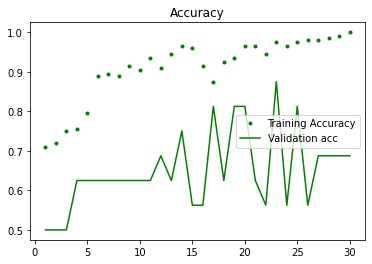

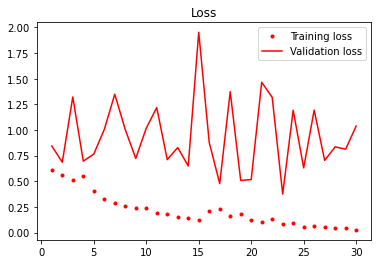

In [73]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

In [74]:
results_train = model.evaluate(train_images, train_y)

7/7 [==============================] - 0s 6ms/step - loss: 0.0172 - acc: 1.0000


In [75]:
results_test = model.evaluate(test_images, test_y)

6/6 [==============================] - 0s 6ms/step - loss: 1.1014 - acc: 0.7556


In [76]:
results_train

[0.01721554435789585, 1.0]

In [77]:
results_test

[1.101435899734497, 0.7555555701255798]

# Misc

X = []
files = glob.glob ("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\test\\NORMAL\\*jpeg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    X.append (image)
print('X shape:', np.array(X).shape)

y = []
files = glob.glob ("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\test\\PNEUMONIA\\*jpeg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    y.append (image)
print('y shape:', np.array(y).shape)

load image as pixel array
image = image.imread("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\NORMAL\\IM-0151-0001.jpeg")
summarize shape of the pixel array
print(image.dtype)
print(image.shape)
display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()